In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.ticker as tck
from pathlib import Path

In [16]:
t = 2
to_Myr   = 9.78462 # converts from snapshot time units to Myr
Omegap   = 0.4 	   # pattern speed of the bar

In [17]:
FIG_DIR = Path('./../figures/')

In [20]:
X, Y, VX, VY, RHO = np.load(f'./../simulation/simulation/output_npy/strongbar/data_{t}.npy')

In [21]:
PHI = np.arctan2(Y, X)
VR = VX * np.cos(PHI) + VY * np.sin(PHI)
VPHI = - VX * np.sin(PHI) + VY * np.cos(PHI)

R = np.sqrt(X ** 2 + Y ** 2)

In [22]:
VPHI_arr = VPHI.reshape(len(R) * len(R))
R_arr = R.reshape(len(R) * len(R))

In [23]:
mask = np.argsort(R_arr)

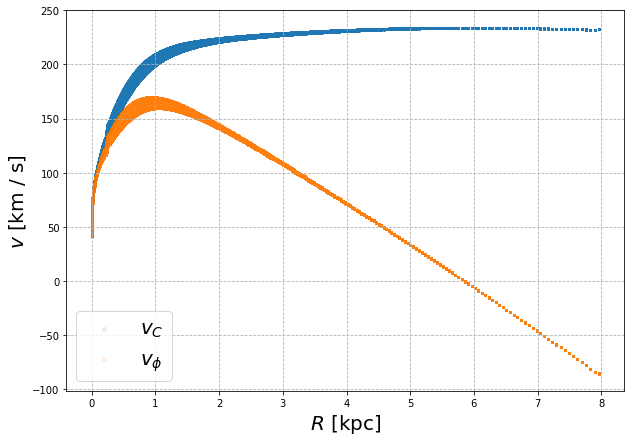

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(R_arr[mask], VPHI_arr[mask] * 100 + R_arr[mask] * 40, s=1, label=r'$v_C$', alpha=0.1)
ax.scatter(R_arr[mask], VPHI_arr[mask] * 100, s=1, label=r'$v_{\phi}$', alpha=0.1)
ax.grid(ls='dashed')
ax.set_xlabel(r'$R$ [kpc]', fontsize=20)
ax.set_ylabel(r'$v$ [km / s]', fontsize=20)
plt.legend(fontsize=20, markerscale=4.)
#plt.savefig(FIG_DIR / 'rotation_curve.png', bbox_inches='tight', dpi=300)